this experiment are intend for comparing the manual eigen value and eigen vector and the sklearn module in PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

c:\users\m477a\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [5]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## Manual

In [8]:
# normalize the data
X = np.array((boston - boston.mean(axis=0))/boston.std(axis=0))

In [21]:
# X

In [9]:
# calculating the the covariance matrix of the data
Cx = np.cov(X, rowvar=False)

In [10]:
L, P = np.linalg.eig(Cx)

In [11]:
# eigen vector
P

array([[-0.2509514 ,  0.31525237, -0.24656649, -0.06177071,  0.08215692,
         0.21965961, -0.77760721, -0.15335048, -0.0459523 , -0.26039028,
         0.08676107,  0.10964435, -0.01936913],
       [ 0.25631454,  0.3233129 , -0.29585782, -0.12871159,  0.32061699,
         0.3233881 ,  0.27499628,  0.40268031,  0.08091897, -0.35813749,
        -0.07142528, -0.26275629, -0.26752723],
       [-0.34667207, -0.11249291,  0.01594592, -0.01714571, -0.00781119,
         0.0761379 ,  0.33957645, -0.17393172,  0.25107654, -0.64441615,
        -0.11319963,  0.30316943,  0.36353226],
       [-0.00504243, -0.45482914, -0.28978082, -0.81594136,  0.08653094,
        -0.16749014, -0.07413621,  0.02466215, -0.03592171,  0.01372777,
        -0.00398268, -0.01392667,  0.00618184],
       [-0.34285231, -0.21911553, -0.12096411,  0.12822614,  0.13685356,
         0.15298267,  0.19963484, -0.08012056, -0.04363045,  0.01852201,
         0.80432257, -0.11131888, -0.23105645],
       [ 0.18924257, -0.149331

In [12]:
# eigen values
L

array([6.12684883, 1.43327512, 1.24261667, 0.85757511, 0.83481594,
       0.65740718, 0.53535609, 0.39609731, 0.06350926, 0.27694333,
       0.16930298, 0.18601437, 0.22023782])

In [13]:
P.shape

(13, 13)

In [14]:
L.shape

(13,)

## T-Square

In [25]:
a = 13 # as number of features

In [17]:
conf_T2 = 0.99

In [26]:
# limit T-square
from scipy.stats import f
F = f.ppf(conf_T2, a, X.shape[0]-a)    

In [27]:
F

2.166137006082116

In [28]:
T2_lim = ((a*(X.shape[0]**2-1))/(X.shape[0]*(X.shape[0]-a)))*F   

In [29]:
T2_lim

28.90221820338113

In [30]:
T = X@P[:,:a]
# @ means matrix multiplication

In [41]:
P[:,:13].shape

(13, 13)

In [31]:
T

array([[ 2.09622303, -0.77234843, -0.34260368, ...,  0.01942101,
         0.03296774, -0.63957348],
       [ 1.45581099, -0.59139995,  0.69451201, ..., -0.12567304,
         0.64017631, -0.08415319],
       [ 2.07254655, -0.59904658, -0.16695638, ...,  0.13319472,
         0.48707471,  0.1802017 ],
       ...,
       [ 0.31205166, -1.15410433,  0.40819364, ...,  0.28168531,
        -0.115542  , -0.58908656],
       [ 0.27025162, -1.04033206,  0.58487527, ...,  0.30140255,
        -0.08692638, -0.59402261],
       [ 0.12567884, -0.76122473,  1.29360184, ...,  0.2325031 ,
        -0.18413878, -0.82258981]])

In [32]:
T.shape

(506, 13)

In [33]:
T2 = np.array([T[i,:]@np.linalg.inv(np.diag(L[:a]))@T[i,:].T for i in range (X.shape[0])])

In [34]:
T2

array([  7.54899417,   4.61211101,   4.97256834,   6.92866756,
         7.13727977,   6.48344407,   6.05868529,  14.24983519,
        25.70221995,  13.67517824,  16.84383144,  10.93213391,
         7.84753394,   5.9629618 ,   6.36095627,   6.06361183,
        10.29622538,   4.94772388,  10.95355843,   5.20051243,
         8.23923728,   5.7066025 ,   7.00161732,   8.2686975 ,
         6.82225341,   7.09749413,   6.75668925,   7.12233135,
         7.57352896,   6.71367121,   8.77766639,   8.04903749,
        16.56198429,   6.9436149 ,  10.4596185 ,   3.9704155 ,
         3.89354344,   4.86947963,   6.78092142,  14.71663314,
        15.55347064,  12.57093319,  10.54872117,  10.69093032,
         4.51177179,   5.66496061,   6.34324414,  10.07549945,
        24.54537484,   7.18920767,   5.48100326,   6.69214312,
         5.45861358,   5.92962512,  24.64839468,  17.09776996,
        14.46106362,  19.33865484,   8.16517149,   5.91520042,
         9.0457077 ,  14.35823689,   9.50203947,   9.41

In [35]:
T2.shape

(506,)

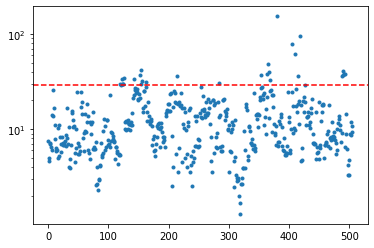

In [37]:
plt.semilogy(T2,'.')
plt.axhline(T2_lim, ls='--', c='r')

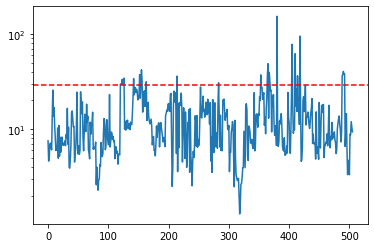

In [38]:
plt.semilogy(T2)
plt.axhline(T2_lim, ls='--', c='r')

In [39]:
print('False alarm rate')
print(f'T2: {(T2>T2_lim).sum()/T2.shape[0]}')

False alarm rate
T2: 0.06126482213438735


### Conclusion
so from the experiment we can get several conclusion which,
- the sklearn preprocessing standardization making the the sklearn pca resulting different with the manual process
- even the result of combination of eigen values are same with manual process the eigen vector are not the same with the manual process and it's more look like with the sklearn pca 